In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

df = pd.read_csv("../data/processed/breast_cancer_clean_v0.csv")


In [4]:
df.shape


(60, 25)

In [6]:
df.head()

,patient_id,age,side,stage,histology,subtype,tumor_size_t,nodes_removed,nodes_positive,neoadjuvant_chemo,...,last_followup_date,mets,mets_site,months_to_mets,followup_months,current_status,hormone_therapy,hormone_therapy_type,adjuvant_chemo,chemo_type
0,197025.0,58.0,1ZQ,I,DUCTAL,TRIPLE NEG,1.6,0.0,0.0,NO,...,2025-05-27,NO,0,0.0,123.0,VSAT,NO,NO,SI,FAC
1,272467.0,47.0,DER,IN SITU,DUCTAL,LUMINAL A,0.6,0.0,0.0,NO,...,2025-07-17,NO,0,0.0,95.0,VSAT,SI,TMX,NaN,NaN
2,279194.0,60.0,DER,IIB,DUCTAL,LUMINAL B,4.5,NaN,NaN,SI,...,2024-04-16,NO,0,0.0,100.0,VSAT,SI,EXEMESTANO,NaN,NaN
3,309706.0,56.0,DER,IIB,DUCTAL,BASAL,1.5,6.0,1.0,SI,...,2022-12-15,NO,0,0.0,69.0,VSAT,NO,NO,NaN,NaN
4,313432.0,51.0,IZQ,IIIC,DUCTAL,HER2+,3.0,17.0,4.0,SI,...,2018-08-27,SI,HIGADO,50.0,50.0,MCAT,NO,NO,SI,NaN


In [5]:
df[["followup_months", "months_to_mets"]].describe()


,followup_months,months_to_mets
count,60.000000,60.000000
mean,69.966667,14.233333
std,31.508388,29.998512
min,20.000000,0.000000
25%,42.750000,0.000000
50%,68.000000,0.000000
75%,96.250000,2.250000
max,128.000000,114.000000


In [7]:
df_surv = df.copy()

# definir evento (ajusta valores si no son SI/NO)
df_surv["event"] = df_surv["mets"].str.upper().isin(["SI", "YES", "1"]).astype(int)

# definir tiempo
df_surv["time"] = np.where(
    df_surv["event"] == 1,
    df_surv["months_to_mets"],
    df_surv["followup_months"]
)

df_surv[["event", "time"]].describe()


,event,time
count,60.000000,60.000000
mean,0.250000,63.733333
std,0.436667,32.161071
min,0.000000,9.000000
25%,0.000000,36.750000
50%,0.000000,57.000000
75%,0.250000,95.250000
max,1.000000,127.000000


In [9]:
df_surv.head()

,patient_id,age,side,stage,histology,subtype,tumor_size_t,nodes_removed,nodes_positive,neoadjuvant_chemo,...,mets_site,months_to_mets,followup_months,current_status,hormone_therapy,hormone_therapy_type,adjuvant_chemo,chemo_type,event,time
0,197025.0,58.0,1ZQ,I,DUCTAL,TRIPLE NEG,1.6,0.0,0.0,NO,...,0,0.0,123.0,VSAT,NO,NO,SI,FAC,0,123.0
1,272467.0,47.0,DER,IN SITU,DUCTAL,LUMINAL A,0.6,0.0,0.0,NO,...,0,0.0,95.0,VSAT,SI,TMX,NaN,NaN,0,95.0
2,279194.0,60.0,DER,IIB,DUCTAL,LUMINAL B,4.5,NaN,NaN,SI,...,0,0.0,100.0,VSAT,SI,EXEMESTANO,NaN,NaN,0,100.0
3,309706.0,56.0,DER,IIB,DUCTAL,BASAL,1.5,6.0,1.0,SI,...,0,0.0,69.0,VSAT,NO,NO,NaN,NaN,0,69.0
4,313432.0,51.0,IZQ,IIIC,DUCTAL,HER2+,3.0,17.0,4.0,SI,...,HIGADO,50.0,50.0,MCAT,NO,NO,SI,NaN,1,50.0


In [10]:
df_surv["event"].value_counts()


event
0    45
1    15
Name: count, dtype: int64

In [11]:
df_surv.to_csv(
    "../data/processed/breast_cancer_survival_v1.csv",
    index=False
)


In [12]:
df_surv.shape
df_surv["event"].mean()


np.float64(0.25)

In [13]:
df_surv["time"].describe()


count     60.000000
mean      63.733333
std       32.161071
min        9.000000
25%       36.750000
50%       57.000000
75%       95.250000
max      127.000000
Name: time, dtype: float64

In [14]:
1 - df_surv["event"].mean()


np.float64(0.75)

In [15]:
pd.crosstab(df_surv["stage"], df_surv["event"])
pd.crosstab(df_surv["subtype"], df_surv["event"])
pd.crosstab(df_surv["nodes_positive"] > 0, df_surv["event"])


event,0,1
nodes_positive,,
False,36,8
True,9,7


<Axes: xlabel='nodes_positive'>

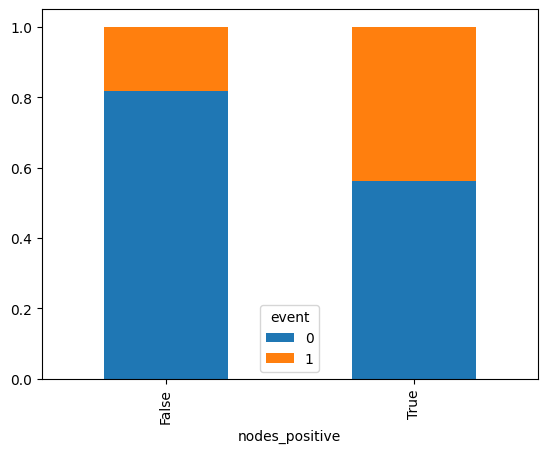

In [25]:
pd.crosstab(df_surv["nodes_positive"] > 0, df_surv["event"], normalize="index").plot(kind="bar", stacked=True)


In [17]:
pd.crosstab(df_surv["stage"], df_surv["event"])


event,0,1
stage,,
I,8,2
IB,1,0
IIA,12,3
IIB,16,2
IIIA,2,4
IIIB,1,1
IIIC,0,2
IN SITU,5,0
IV,0,1


<Axes: xlabel='stage_group'>

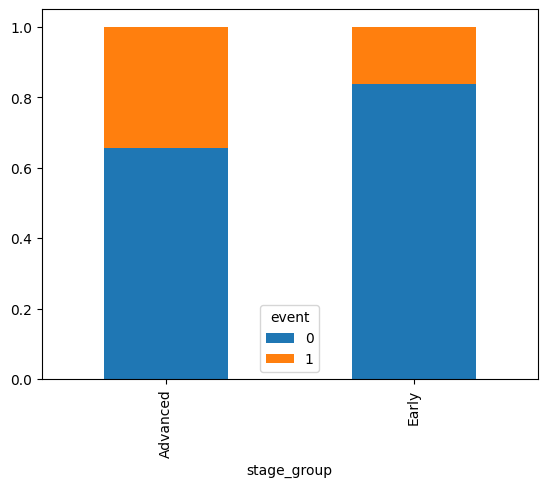

In [26]:
df_surv["stage_group"] = np.where(
    df_surv["stage"].isin(["IN SITU", "I", "IB", "IIA"]),
    "Early",
    "Advanced"
)

pd.crosstab(df_surv["stage_group"], df_surv["event"], normalize="index").plot(kind="bar", stacked=True)


In [18]:
pd.crosstab(df_surv["subtype"], df_surv["event"])


event,0,1
subtype,,
BASAL,2,0
HER2+,3,3
LUMINAL A,26,3
LUMINAL B,9,7
TRIPLE NEG,5,2


<Axes: xlabel='subtype_group'>

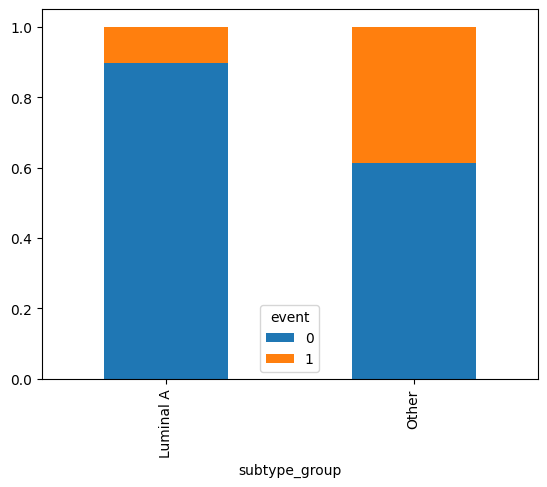

In [27]:
df_surv["subtype_group"] = np.where(
    df_surv["subtype"] == "LUMINAL A",
    "Luminal A",
    "Other"
)

pd.crosstab(df_surv["subtype_group"], df_surv["event"], normalize="index").plot(kind="bar", stacked=True)


In [19]:
df_surv.groupby(df_surv["tumor_size_t"] > df_surv["tumor_size_t"].median())["event"].mean()


tumor_size_t
False    0.225806
True     0.275862
Name: event, dtype: float64

<Axes: title={'center': 'tumor_size_t'}, xlabel='event'>

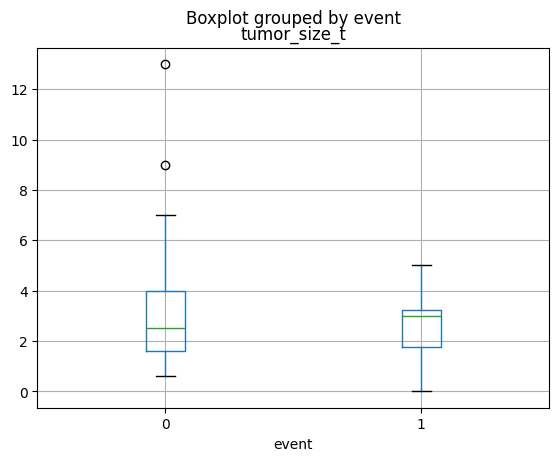

In [29]:
df_surv.boxplot(column="tumor_size_t", by="event")


In [20]:
df_surv.groupby(df_surv["age"] > 50)["event"].mean()


age
False    0.160000
True     0.314286
Name: event, dtype: float64

<Axes: title={'center': 'age'}, xlabel='event'>

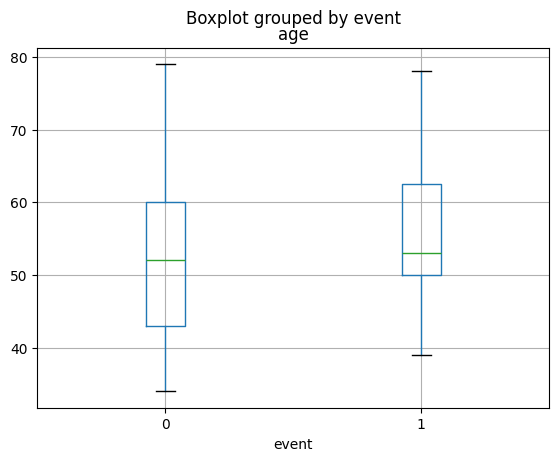

In [28]:
df_surv.boxplot(column="age", by="event")


In [21]:
pd.crosstab(df_surv["lvi_positive"], df_surv["event"])


event,0,1
lvi_positive,,
NO,33,3
SI,11,12


<Axes: xlabel='lvi_positive'>

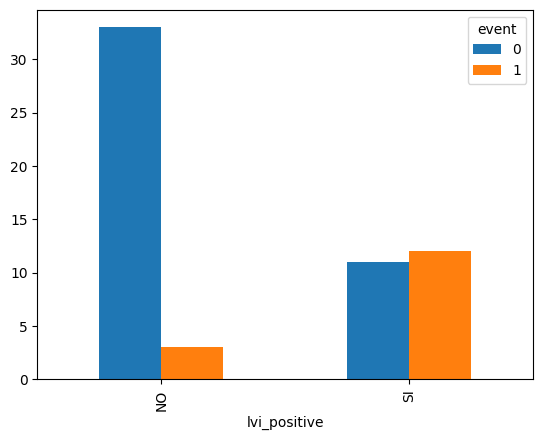

In [24]:
pd.crosstab(df_surv["lvi_positive"], df_surv["event"]).plot(kind="bar")


In [22]:
pd.crosstab(df_surv["hormone_therapy"], df_surv["event"])


event,0,1
hormone_therapy,,
NO,13,6
SI,32,9


In [23]:
pd.crosstab(df_surv["neoadjuvant_chemo"], df_surv["event"])


event,0,1
neoadjuvant_chemo,,
NO,25,5
SI,19,10


<Axes: xlabel='neoadjuvant_chemo'>

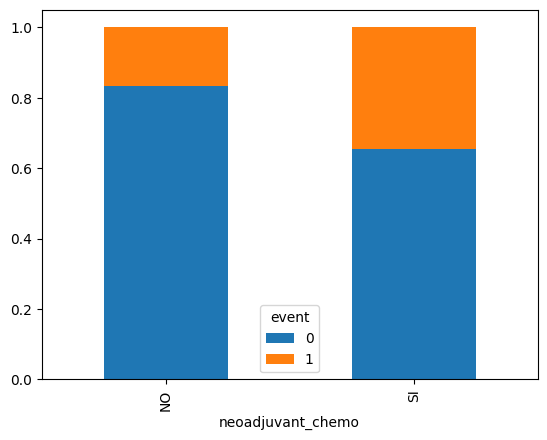

In [30]:
pd.crosstab(df_surv["neoadjuvant_chemo"], df_surv["event"], normalize="index").plot(kind="bar", stacked=True)


In [16]:
df.columns 

Index(['patient_id', 'age', 'side', 'stage', 'histology', 'subtype',
       'tumor_size_t', 'nodes_removed', 'nodes_positive', 'neoadjuvant_chemo',
       'rt_dose', 'rt_fractionation', 'rt_boost', 'lvi_positive', 'dx_date',
       'last_followup_date', 'mets', 'mets_site', 'months_to_mets',
       'followup_months', 'current_status', 'hormone_therapy',
       'hormone_therapy_type', 'adjuvant_chemo', 'chemo_type'],
      dtype='str')

## 🔎 Exploratory Data Analysis Summary

The exploratory data analysis included **60 breast cancer patients** treated with breast-conserving surgery, with a median follow-up of approximately **57 months** (IQR: 36.8–95.3 months). During follow-up, **15 patients (25%) developed metastatic disease**, while **45 patients (75%) were censored**, indicating an adequate proportion of events for survival analysis.

### Follow-up and Event Distribution
- Median follow-up time was **57 months**, with a maximum of **127 months**, indicating long-term surveillance.
- The majority of patients did not experience metastatic progression, consistent with an early-stage treated cohort.

### Clinical Covariates and Crude Associations

Several clinical and pathological variables showed meaningful associations with the occurrence of metastatic events:

- **Lymphovascular invasion (LVI)** demonstrated the strongest association:
  - Patients with LVI-positive tumors showed a substantially higher proportion of metastatic events (~52%) compared to LVI-negative patients (~8%).

- **Lymph node status** was also strongly associated with outcomes:
  - Patients with positive lymph nodes had a markedly higher crude event rate (~44%) compared to node-negative patients (~18%).

- **Tumor stage** showed a clear gradient, with higher stages (III–IV) presenting a higher proportion of events. However, small sample sizes in some categories suggest the need for stage regrouping in further analyses.

- **Molecular subtype** demonstrated relevant prognostic differences:
  - Luminal A tumors showed the lowest event proportion (~10%),
  - Luminal B and HER2-positive subtypes were associated with higher event rates (~44–50%).

- **Age** showed a moderate association, with patients older than 50 years presenting a higher crude event rate (~31%) compared to younger patients (~16%).

- **Tumor size** demonstrated a weak association with events when dichotomized at the median.

- **Systemic treatments** (neoadjuvant chemotherapy and hormonotherapy) showed differences in crude event proportions; however, these findings likely reflect confounding by indication rather than treatment effect and should be interpreted cautiously.

### Summary
Overall, the EDA identified **lymphovascular invasion, lymph node involvement, tumor stage, and molecular subtype** as the most informative variables for subsequent survival analysis. These findings guided the selection of covariates for Kaplan–Meier survival estimation and Cox proportional hazards modeling.
